<a href="https://colab.research.google.com/github/Kraljevic1111/ML-Project-Products-review-analysis/blob/main/Notebook/Products_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Kraljevic1111/ML-Project-Products-review-analysis/main/data/products.csv"
df = pd.read_csv(url)
print("First 10 rows")
print(df.head(10))
print("Print number of rows:",len(df))
print("Number of rows,columns:")
print(df.shape)
print("Information about dataset")
print(df.info())

First 10 rows
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   
5           6  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            6   
6           7               apple iphone 8 plus 64 gb space grey            7   
7           8                apple iphone 8 plus 64gb space grey            8   
8           9                apple iphone 8 plus 64gb space grey            9   
9          10                apple iphone 8 plus 64gb space grey           10   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2

## Checking for missing values

In [10]:
print("Missing values per column:")
Missing_values = df.isna().sum()
print(Missing_values)

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## Showing mising values via chart

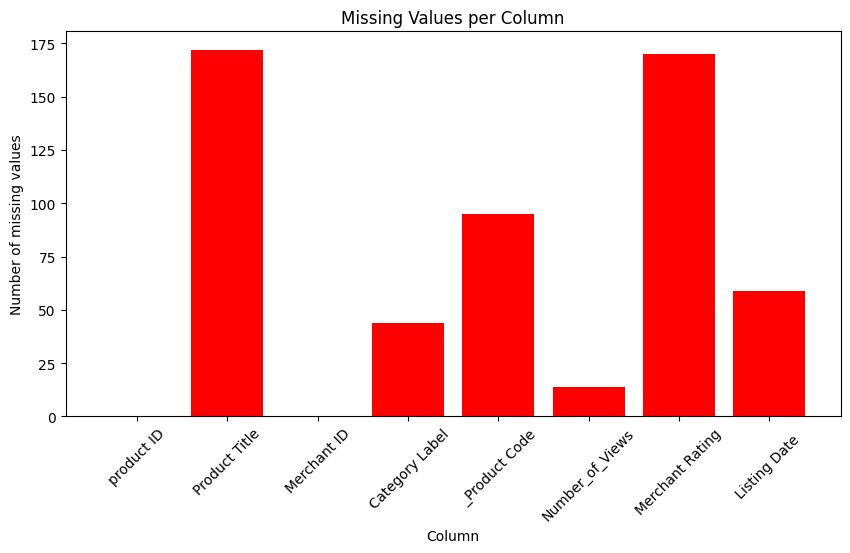

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
plt.bar(Missing_values.index,Missing_values.values,color = 'red')
plt.title("Missing Values per Column")
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.xticks(rotation = 45)
plt.show()


## Analizing columns Merchant Rating and Number of View to see if there is any correlation beetwen them.

/tmp/ipython-input-721485788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")


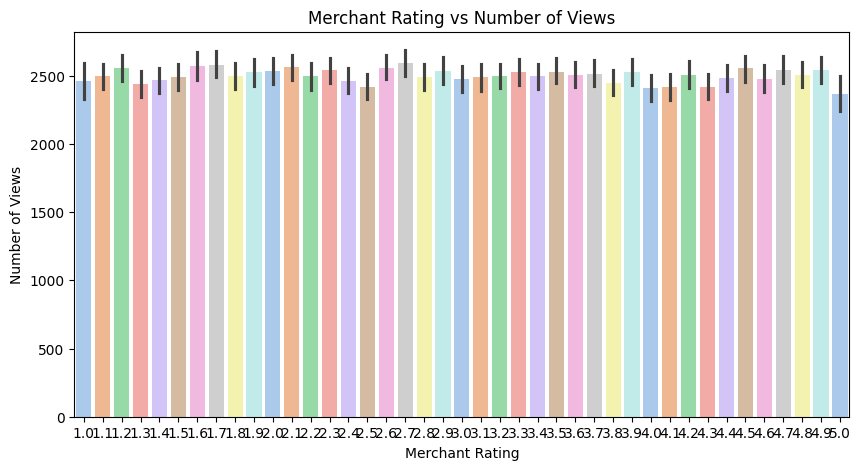

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data = df,x = "Merchant Rating",y = "Number_of_Views",palette = "pastel")
plt.title("Merchant Rating vs Number of Views")
plt.xlabel("Merchant Rating")
plt.ylabel("Number of Views")
plt.show()


## After our analysis wee decided taht columns are not in any correlation.Rating is not associeted with view in any way.